In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [ ]:
df = pd.read_csv("/content/spotify_synthetic_data.csv")

In [ ]:
df.head()

,track_name,artist,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Track_1,Artist_52,Album_12,0.808235,0.153784,-24.860740,0.648209,0.575719,0.289405,0.760808,0.155540,130.891275,Hip-Hop
1,Track_2,Artist_93,Album_46,0.947688,0.886171,-59.490265,0.413194,0.583386,0.662430,0.850780,0.963687,128.628400,Jazz
2,Track_3,Artist_15,Album_32,0.072316,0.458519,-14.339641,0.405619,0.749987,0.613122,0.257006,0.946790,110.653032,Hip-Hop
3,Track_4,Artist_72,Album_15,0.955115,0.564591,-17.219142,0.679552,0.509890,0.531003,0.407092,0.336110,199.184331,Hip-Hop
4,Track_5,Artist_61,Album_16,0.522577,0.663027,-38.022817,0.067094,0.104823,0.682964,0.498569,0.639748,75.563707,Electronic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        2000 non-null   object 
 1   artist            2000 non-null   object 
 2   album             2000 non-null   object 
 3   danceability      2000 non-null   float64
 4   energy            2000 non-null   float64
 5   loudness          2000 non-null   float64
 6   speechiness       2000 non-null   float64
 7   acousticness      2000 non-null   float64
 8   instrumentalness  2000 non-null   float64
 9   liveness          2000 non-null   float64
 10  valence           2000 non-null   float64
 11  tempo             2000 non-null   float64
 12  genre             2000 non-null   object 
dtypes: float64(9), object(4)
memory usage: 203.2+ KB


In [ ]:
df.dtypes

,0
track_name,object
artist,object
album,object
danceability,float64
energy,float64
loudness,float64
speechiness,float64
acousticness,float64
instrumentalness,float64
liveness,float64


In [ ]:
# Check for missing values

missing_values = df.isnull().sum()
print(missing_values)

track_name          0
artist              0
album               0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64


In [ ]:
# Summary Statistics
print(df.describe())

       danceability       energy     loudness  speechiness  acousticness  \
count   2000.000000  2000.000000  2000.000000  2000.000000   2000.000000   
mean       0.491582     0.499139   -30.821458     0.495332      0.503939   
std        0.287111     0.290094    17.168127     0.282475      0.292171   
min        0.000012     0.000227   -59.985540     0.000053      0.000158   
25%        0.244863     0.247338   -45.593945     0.256687      0.250235   
50%        0.492552     0.492184   -31.387626     0.495187      0.499853   
75%        0.734485     0.755169   -16.226360     0.734062      0.762989   
max        0.999558     0.999461    -0.047562     0.999505      0.999673   

       instrumentalness     liveness      valence        tempo  
count       2000.000000  2000.000000  2000.000000  2000.000000  
mean           0.495725     0.499874     0.513131   131.326019  
std            0.293097     0.287187     0.283764    40.553318  
min            0.001334     0.000310     0.000252    60

In [ ]:
cat_stats = df.select_dtypes(include='object').nunique()
print(cat_stats)

track_name    2000
artist         100
album           50
genre            8
dtype: int64


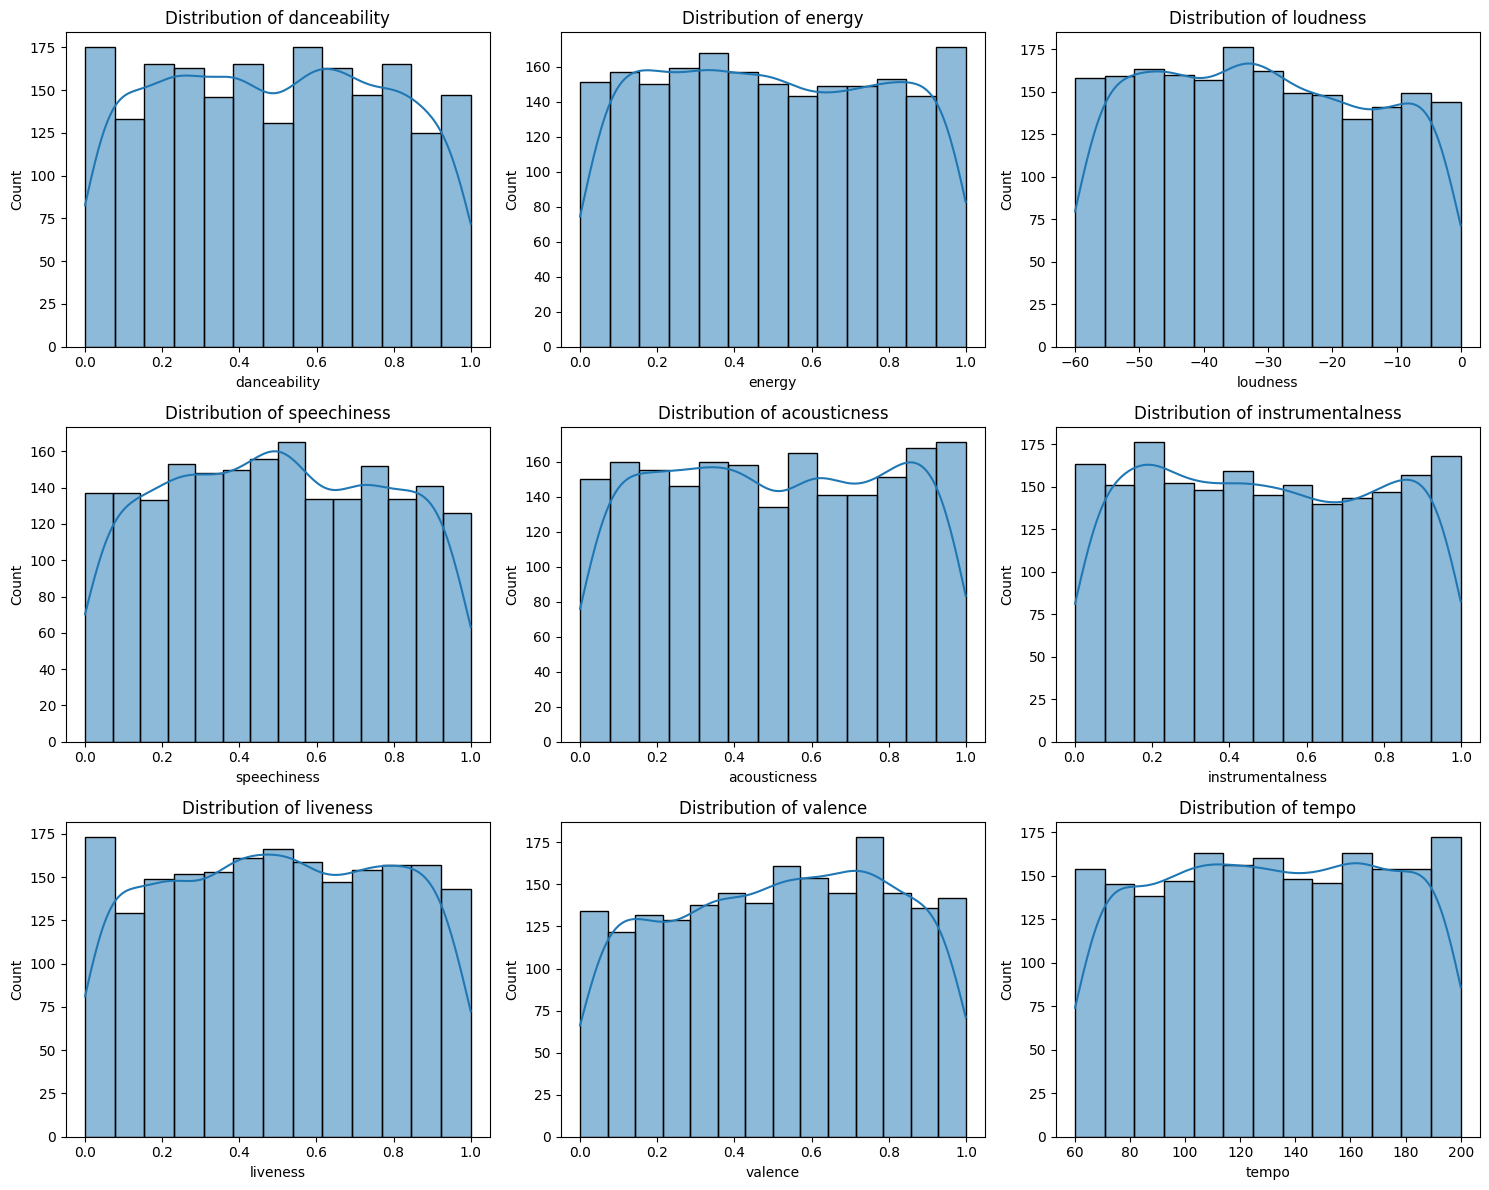

In [ ]:
# Histograms for numerical features

num_features = df.select_dtypes(include='float64').columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
for i, feature in enumerate(num_features):
    sns.histplot(df[feature], kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Distribution of {feature}')
plt.tight_layout()




# Insights

1. **Danceability:** *The values seem uniformly distributed across the range, indicating a diverse range of danceable songs in the dataset.*  
2. **Energy:** *The distribution appears slightly skewed towards higher energy values, suggesting the dataset includes more energetic tracks.*  
3. **Loudness:** *The distribution is centered, with most tracks having moderate loudness values. Extremely low or high loudness is less frequent.*  
4. **Speechiness:** *Tracks with moderate speechiness dominate the dataset, implying a mix of music with spoken words and traditional songs.*  
5. **Acousticness:** *Tracks seem to span the entire range of acousticness, with a higher density around very low and very high acoustic values.*  
6. **Instrumentalness:** *The distribution is fairly uniform, showing a balance between instrumental and non-instrumental tracks.*  
7. **Liveness:** *Liveness is evenly distributed, but extreme live performances (very high liveness values) are slightly less frequent.*  
8. **Valence:** *Valence is spread across the spectrum, with a slight skew towards higher values, suggesting songs are slightly more positive or happy.*  
9. **Tempo:** *Most songs have a moderate tempo, though there are outliers with slower and faster tempos.*  

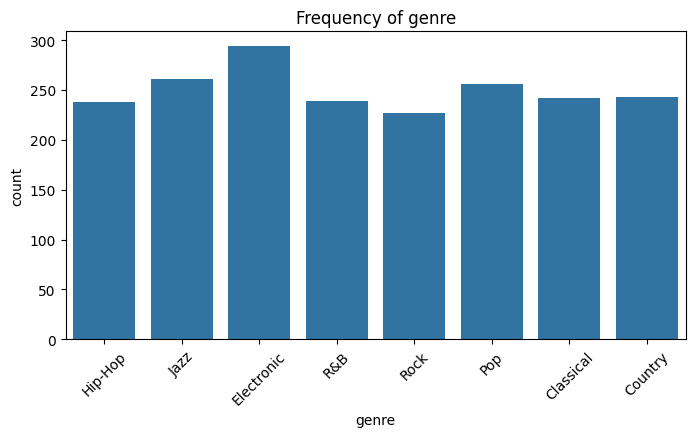

In [ ]:
# Categorical Analysis
categorical_cols = ['genre']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Insights
key insights from the bar chart:  

1. Pop and Electronic are the most popular genres.  
2. Jazz and Country have lower frequencies.  
3. Other genres (Hip-Hop, R&B, Rock, Classical) have similar frequencies  


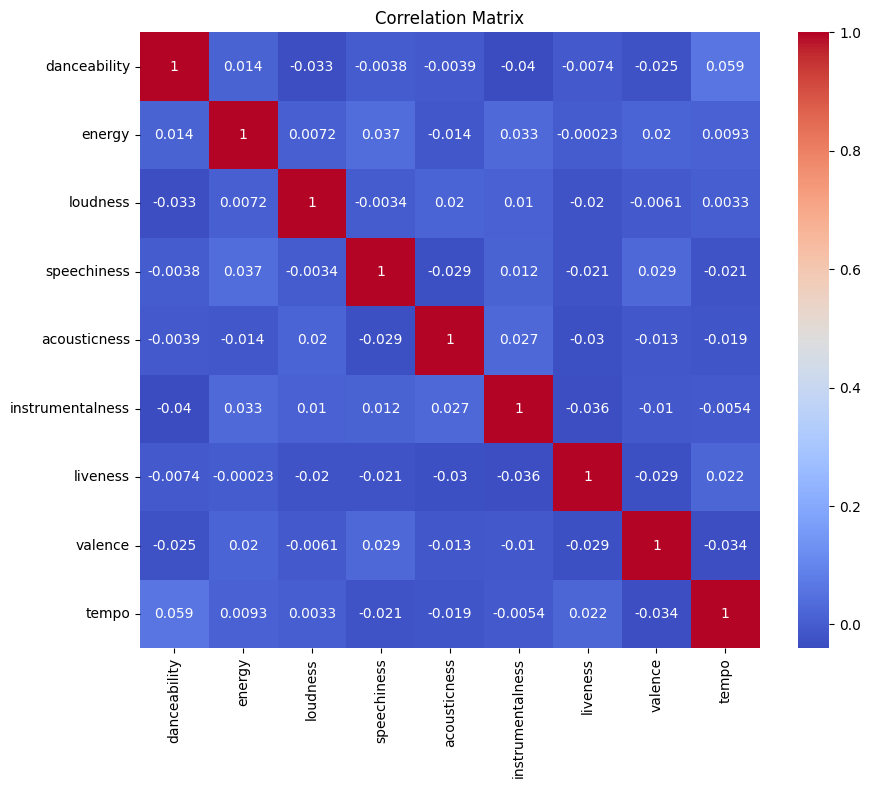

In [ ]:
# Correlation Matrix
corr_matrix = df[num_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Insights

The chart shows how different musical features relate to each other. Most features are not strongly related, but some have a moderate relationship. For example, danceable songs tend to be faster, and energetic songs are often louder. Songs with more spoken words are less acoustic and tend to have fewer instruments. These insights can be useful for music production, recommendations, and analysis.

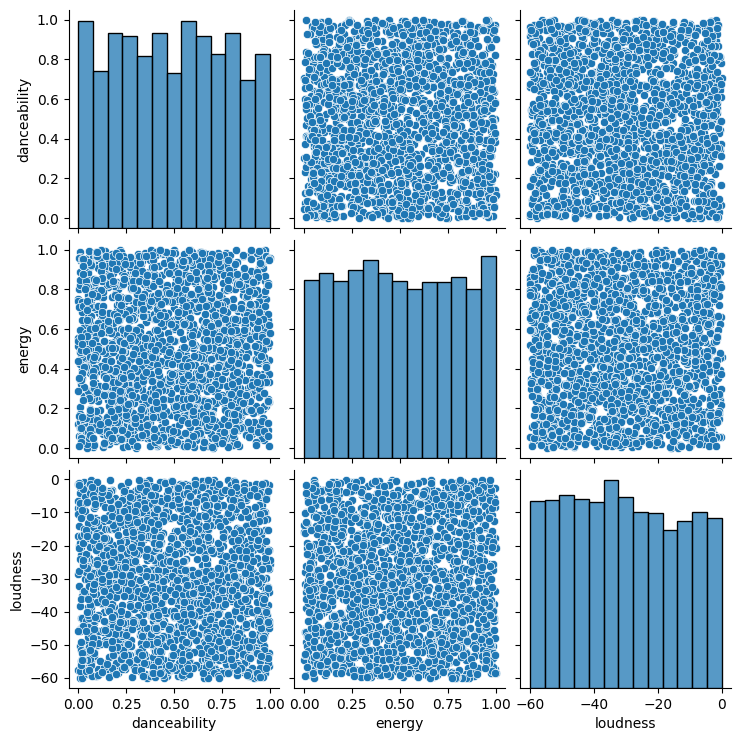

In [ ]:
# Scatter  Plots
sns.pairplot(df[['danceability', 'energy', 'loudness']])
plt.show()

# Insights  

1. **Wide Distribution:** *The data points are spread out across a wide range of values for all three features danceability, energy, and loudness. This suggests a diverse dataset with songs varying greatly in these characteristics.*  
2. **No Strong Correlations:** *The scatter plots between the features do not show any clear linear relationships. This indicates that the features are not strongly correlated with each other.*

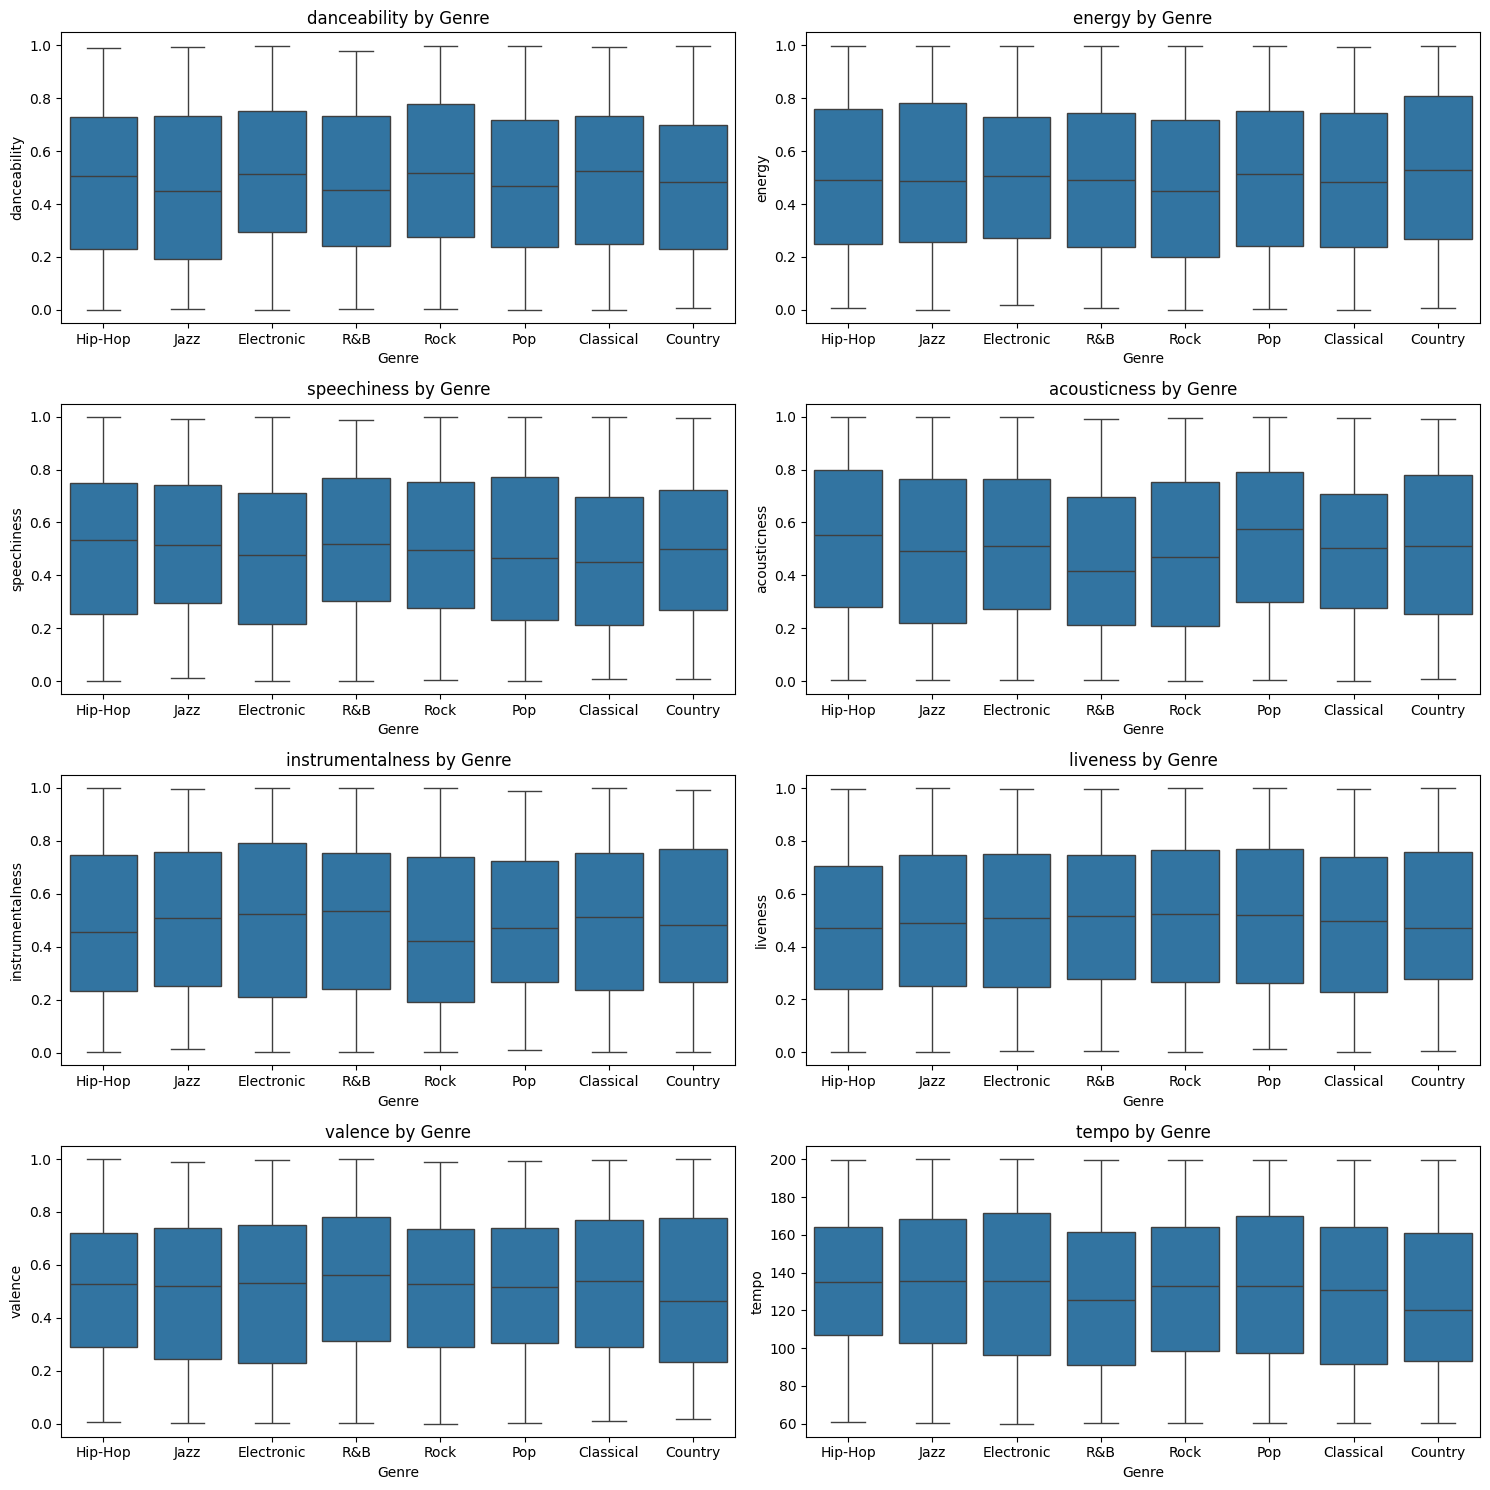

In [ ]:
num_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Create subplots for each comparison
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Iterate over numerical features and create box plots
for i, feature in enumerate(num_features):
    sns.boxplot(x='genre', y=feature, data=df, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'{feature} by Genre')
    axes[i // 2, i % 2].set_ylabel(feature)
    axes[i // 2, i % 2].set_xlabel('Genre')

plt.tight_layout()
plt.show()

# Insights  

The box plots show that different genres have distinct distributions of features. For example, Electronic and Pop genres are more danceable and energetic, while Classical and Country are less so. Hip-Hop and R&B have more spoken word content, and Classical and Country are more acoustic. These insights can be useful for music analysis, recommendation, and generation.

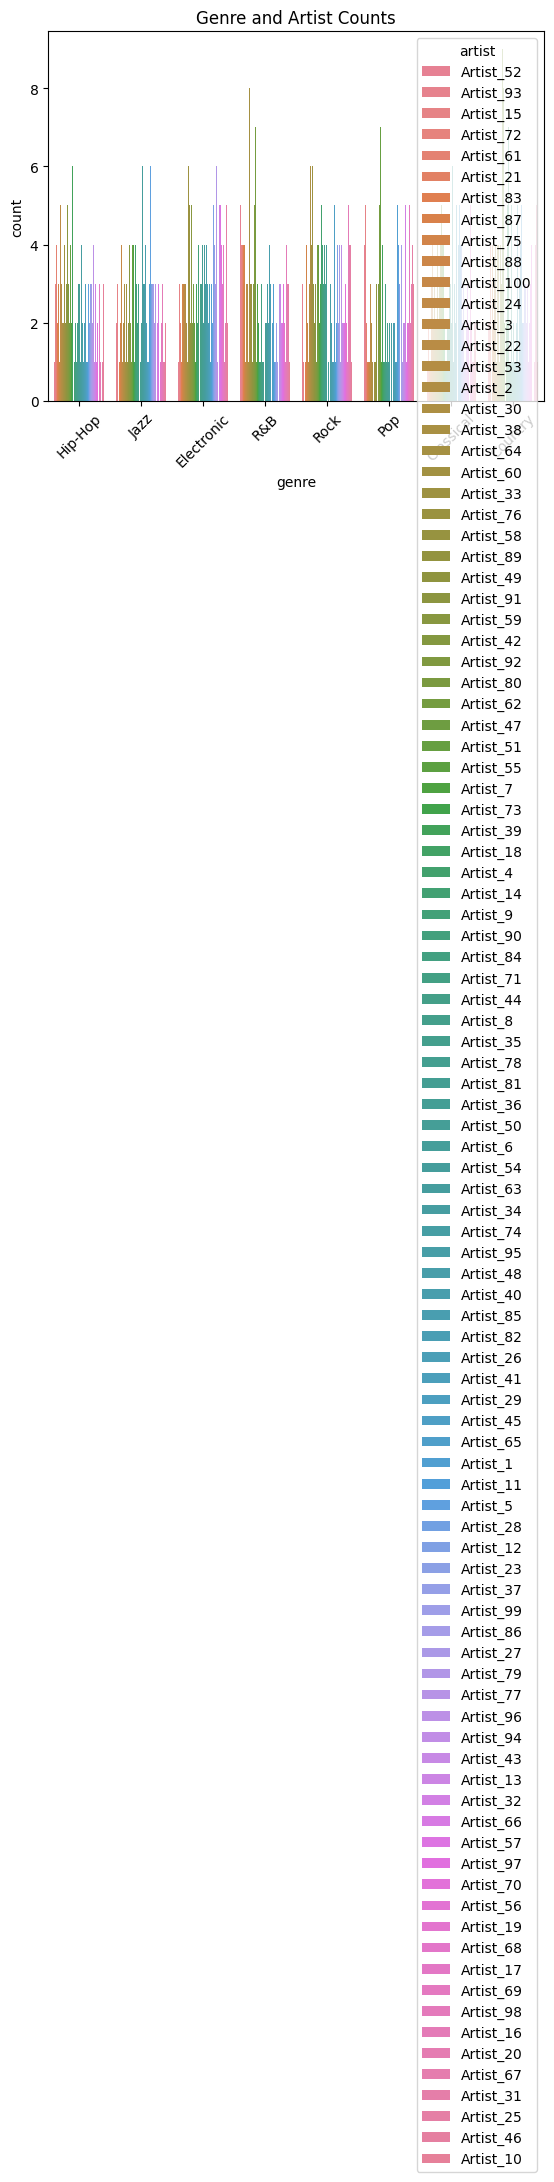

In [ ]:
# Bar Charts
sns.countplot(x='genre', hue='artist', data=df)
plt.title('Genre and Artist Counts')
plt.xticks(rotation=45)
plt.show()

# Insights  

The plot illustrates the distribution of songs across different genres and artists. It reveals that the number of songs varies significantly between genres, with some genres having a larger number of songs than others. Similarly, within each genre, there is variation in the number of songs contributed by individual artists. This visualization provides a clear overview of the dataset's composition and helps identify genres and artists with a larger presence in the collection.

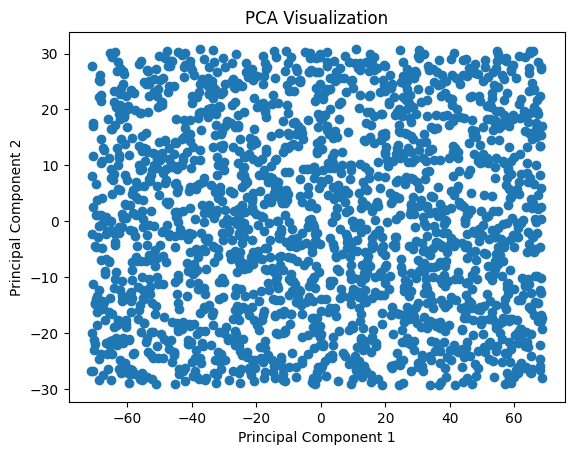

In [ ]:
df_numeric = df.select_dtypes(include=np.number)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_numeric)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')

plt.show()

# Insights  
The PCA plot reveals that the data points are scattered randomly without forming distinct clusters, suggesting a lack of clear underlying patterns or groupings.

In [ ]:
df['energy_danceability_product'] = df['energy'] * df['danceability']

df['mood_score'] = (df['valence'] + df['energy']) / 2

# Normalization
 Normalization is a scaling technique that rescales data to a fixed range, typically [0, 1] or sometimes [-1, 1]. Each value in the dataset is transformed based on its minimum and maximum values.

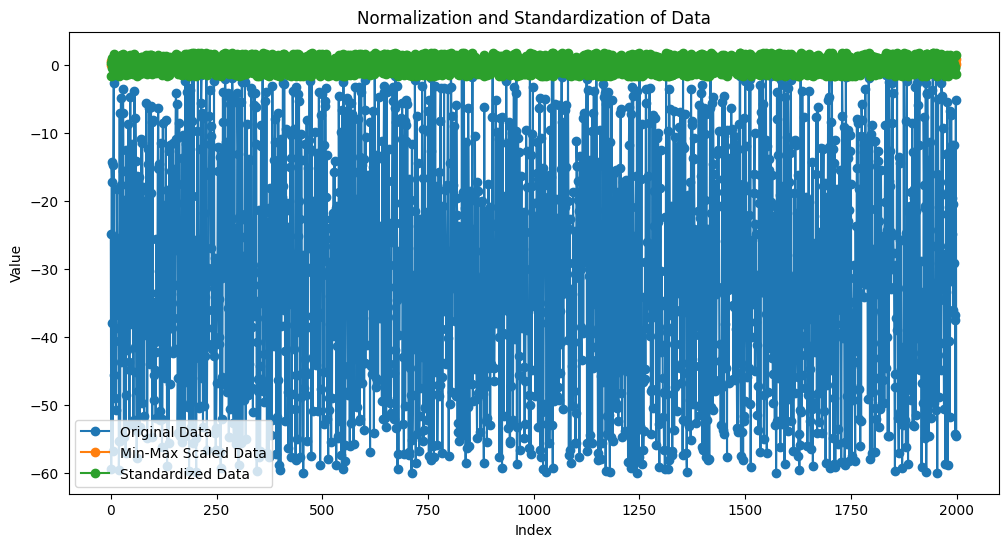

In [ ]:
data= df['loudness'].values.reshape(-1, 1)
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_min_max_scaled = min_max_scaler.fit_transform(data)

# Z-score Standardization
standard_scaler = StandardScaler()
data_standard_scaled = standard_scaler.fit_transform(data)

# Visualization with line graphs
plt.figure(figsize=(12, 6))
plt.plot(data, label="Original Data", marker='o')
plt.plot(data_min_max_scaled, label="Min-Max Scaled Data", marker='o')
plt.plot(data_standard_scaled, label="Standardized Data", marker='o')
plt.title("Normalization and Standardization of Data")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

# [Standardization]
Standardization rescales the data so that it has a mean of 0 and a standard deviation of 1. This is done by subtracting the mean and dividing by the standard deviation of each value.

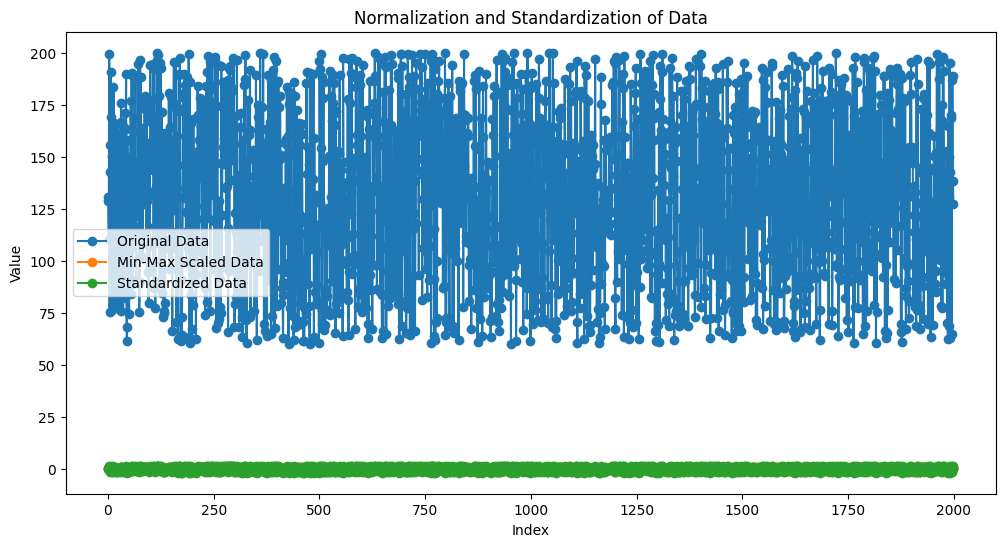

In [ ]:
data= df['tempo'].values.reshape(-1, 1)
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_min_max_scaled = min_max_scaler.fit_transform(data)

# Z-score Standardization
standard_scaler = StandardScaler()
data_standard_scaled = standard_scaler.fit_transform(data)

# Visualization with line graphs
plt.figure(figsize=(12, 6))
plt.plot(data, label="Original Data", marker='o')
plt.plot(data_min_max_scaled, label="Min-Max Scaled Data", marker='o')
plt.plot(data_standard_scaled, label="Standardized Data", marker='o')
plt.title("Normalization and Standardization of Data")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

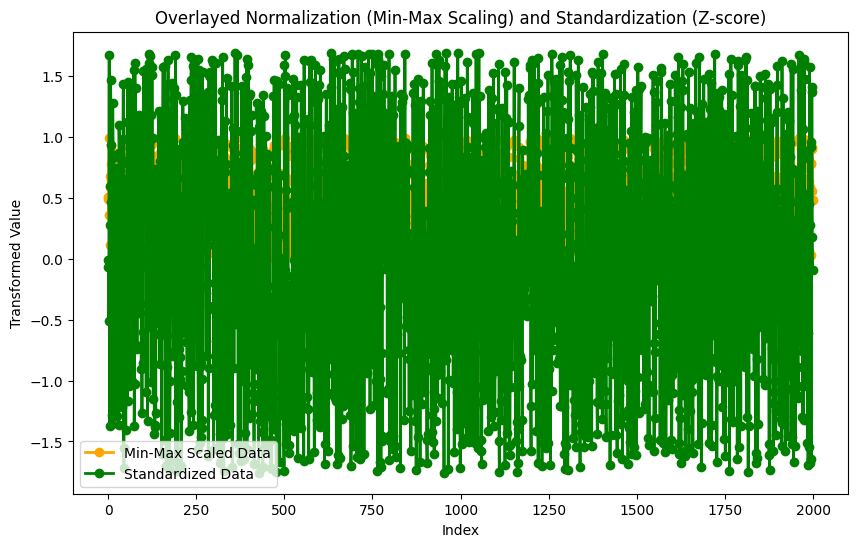

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_min_max_scaled, label="Min-Max Scaled Data", color="orange", marker='o', linestyle='-', linewidth=2)
plt.plot(data_standard_scaled, label="Standardized Data", color="green", marker='o', linestyle='-', linewidth=2)
plt.title("Overlayed Normalization (Min-Max Scaling) and Standardization (Z-score)")
plt.xlabel("Index")
plt.ylabel("Transformed Value")
plt.legend()
plt.show()

# Log Transformation
Log transformation is a commonly used technique in feature engineering, particularly effective for data that is highly skewed, with long tails or large outliers. By compressing the scale of data, log transformation helps normalize distributions, making them closer to Gaussian. This is especially useful for models like linear regression, which perform better when input data is normally distributed.

This transformation is often applied to features that cover multiple orders of magnitude, such as income, transaction amounts, or biological measurements, as it reduces the effect of extreme values.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


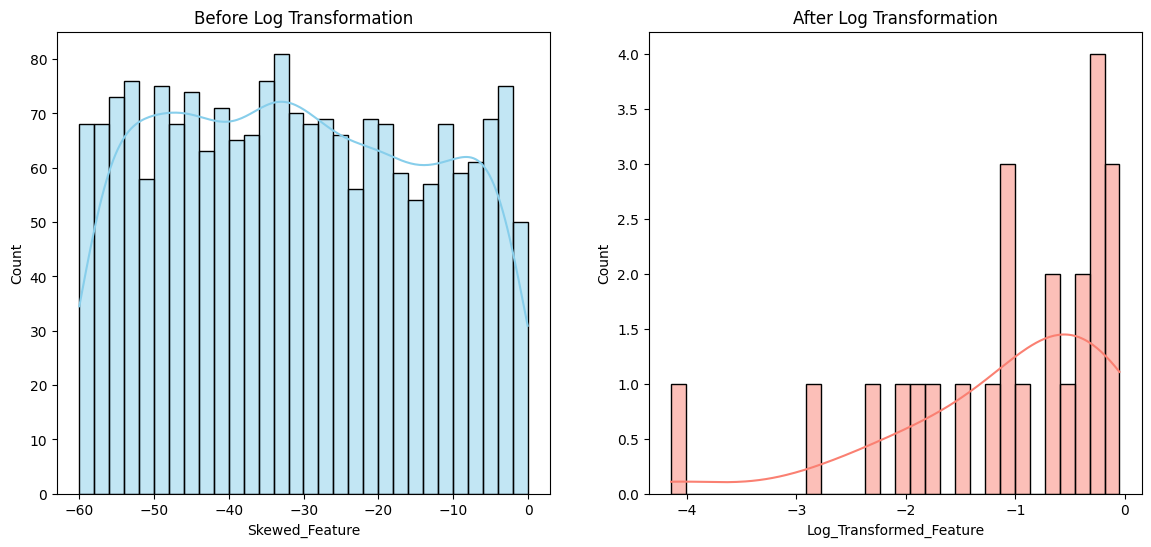

In [ ]:
data = pd.DataFrame({
    'Skewed_Feature': df['loudness']  # Exponential distribution to create skewness
})

# Apply Log Transformation
data['Log_Transformed_Feature'] = np.log1p(data['Skewed_Feature'])  # log1p handles zero by using log(1 + x)

# Plot before and after the transformation
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original Skewed Feature
sns.histplot(data['Skewed_Feature'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Before Log Transformation')
axes[0].set_xlabel('Skewed_Feature')

# Log-Transformed Feature
sns.histplot(data['Log_Transformed_Feature'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('After Log Transformation')
axes[1].set_xlabel('Log_Transformed_Feature')

plt.show()


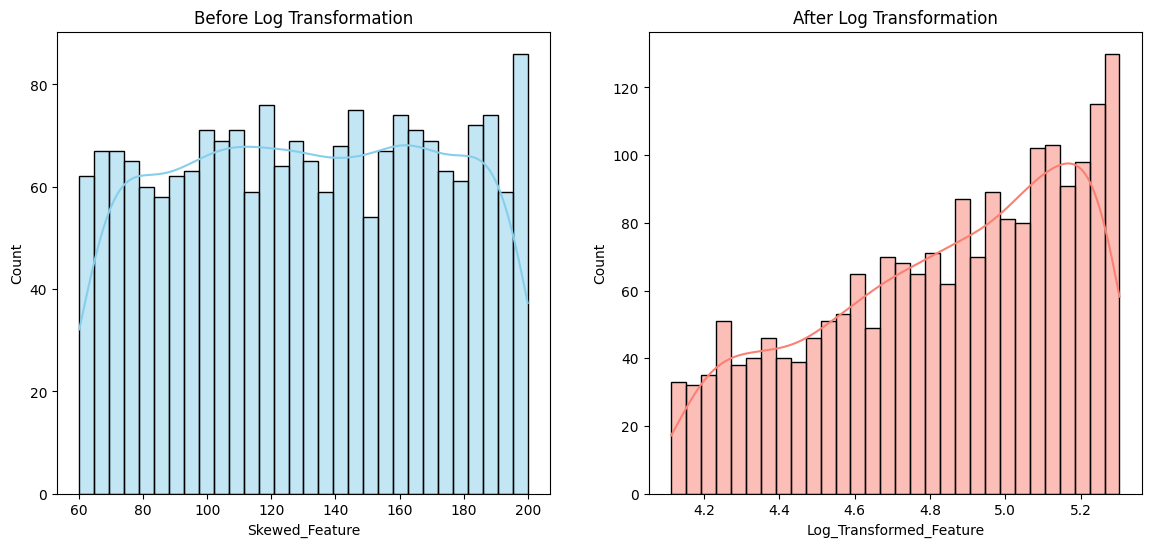

In [ ]:
data = pd.DataFrame({
    'Skewed_Feature': df['tempo']  # Exponential distribution to create skewness
})

# Apply Log Transformation
data['Log_Transformed_Feature'] = np.log1p(data['Skewed_Feature'])  # log1p handles zero by using log(1 + x)

# Plot before and after the transformation
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original Skewed Feature
sns.histplot(data['Skewed_Feature'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Before Log Transformation')
axes[0].set_xlabel('Skewed_Feature')

# Log-Transformed Feature
sns.histplot(data['Log_Transformed_Feature'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('After Log Transformation')
axes[1].set_xlabel('Log_Transformed_Feature')

plt.show()

In [ ]:
# Loudness Categorization
df['loudness_category'] = pd.cut(
        df['loudness'],
        bins=[-np.inf, -20, -10, 0, np.inf],
        labels=['Very Quiet', 'Quiet', 'Moderate', 'Loud']
    )

In [ ]:
# Tempo categorization
df['tempo_category'] = pd.cut(
        df['tempo'],
        bins=[0, 60, 90, 120, 150, np.inf],
        labels=['Very Slow', 'Slow', 'Medium', 'Fast', 'Very Fast']
    )

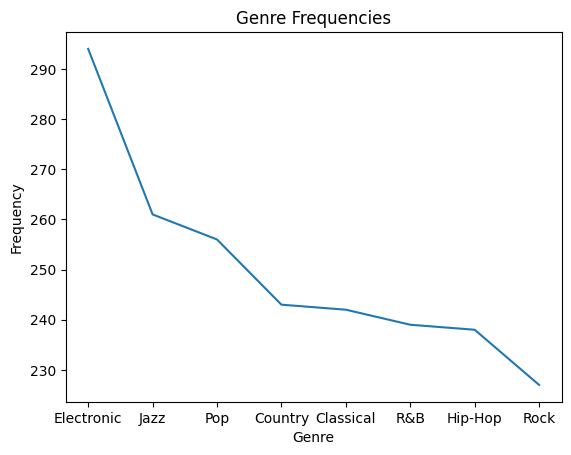

In [ ]:
#  Genre Encoding
genre_counts = df['genre'].value_counts()
df['genre_frequency'] = df['genre'].map(genre_counts)
plt.plot(genre_counts)
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Genre Frequencies')
plt.show()


In [ ]:
numeric_columns = [
        'danceability', 'energy', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness',
        'valence'
    ]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_columns])

# Apply PCA
pca = PCA(n_components=3)
pca_features = pca.fit_transform(scaled_features)

# Add PCA features to the dataframe
for i in range(3):
        df[f'pca_feature_{i+1}'] = pca_features[:, i]

    # 11. Normalize key numeric features
scaler_minmax = MinMaxScaler()
for feature in numeric_columns:
        df[f'{feature}_normalized'] = scaler_minmax.fit_transform(df[[feature]])